In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [2]:
path = r"C:\Users\User\Desktop\Akshay project\Data set\happiness_score_dataset.csv"
import chardet
with open (path,'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result    
    

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [4]:
dataframe = pd.read_csv(path,encoding = 'ascii')
dataframe.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
dataframe.shape

(158, 12)

# 158 rows and 12 columns in the dataset

In [6]:
dataframe.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [7]:
dataframe.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

# No missing values 

In [8]:
dataframe["Country"].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [9]:
#Converting the Country into the encoder code.
lab_enc=LabelEncoder()
converted = lab_enc.fit_transform(df["Country"])
dataframenew = pd.DataFrame(converted)
dataframenew.head(10)


,0
0,135
1,58
2,37
3,105
4,24
5,45
6,99
7,134
8,100
9,6


In [10]:
dataframe['Country'] = converted

In [12]:
dataframe.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [13]:
dataframe1=dataframe.drop(columns=['Region'])


In [14]:
dataframe1.head()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Region is deleted above and we have country in the coded form

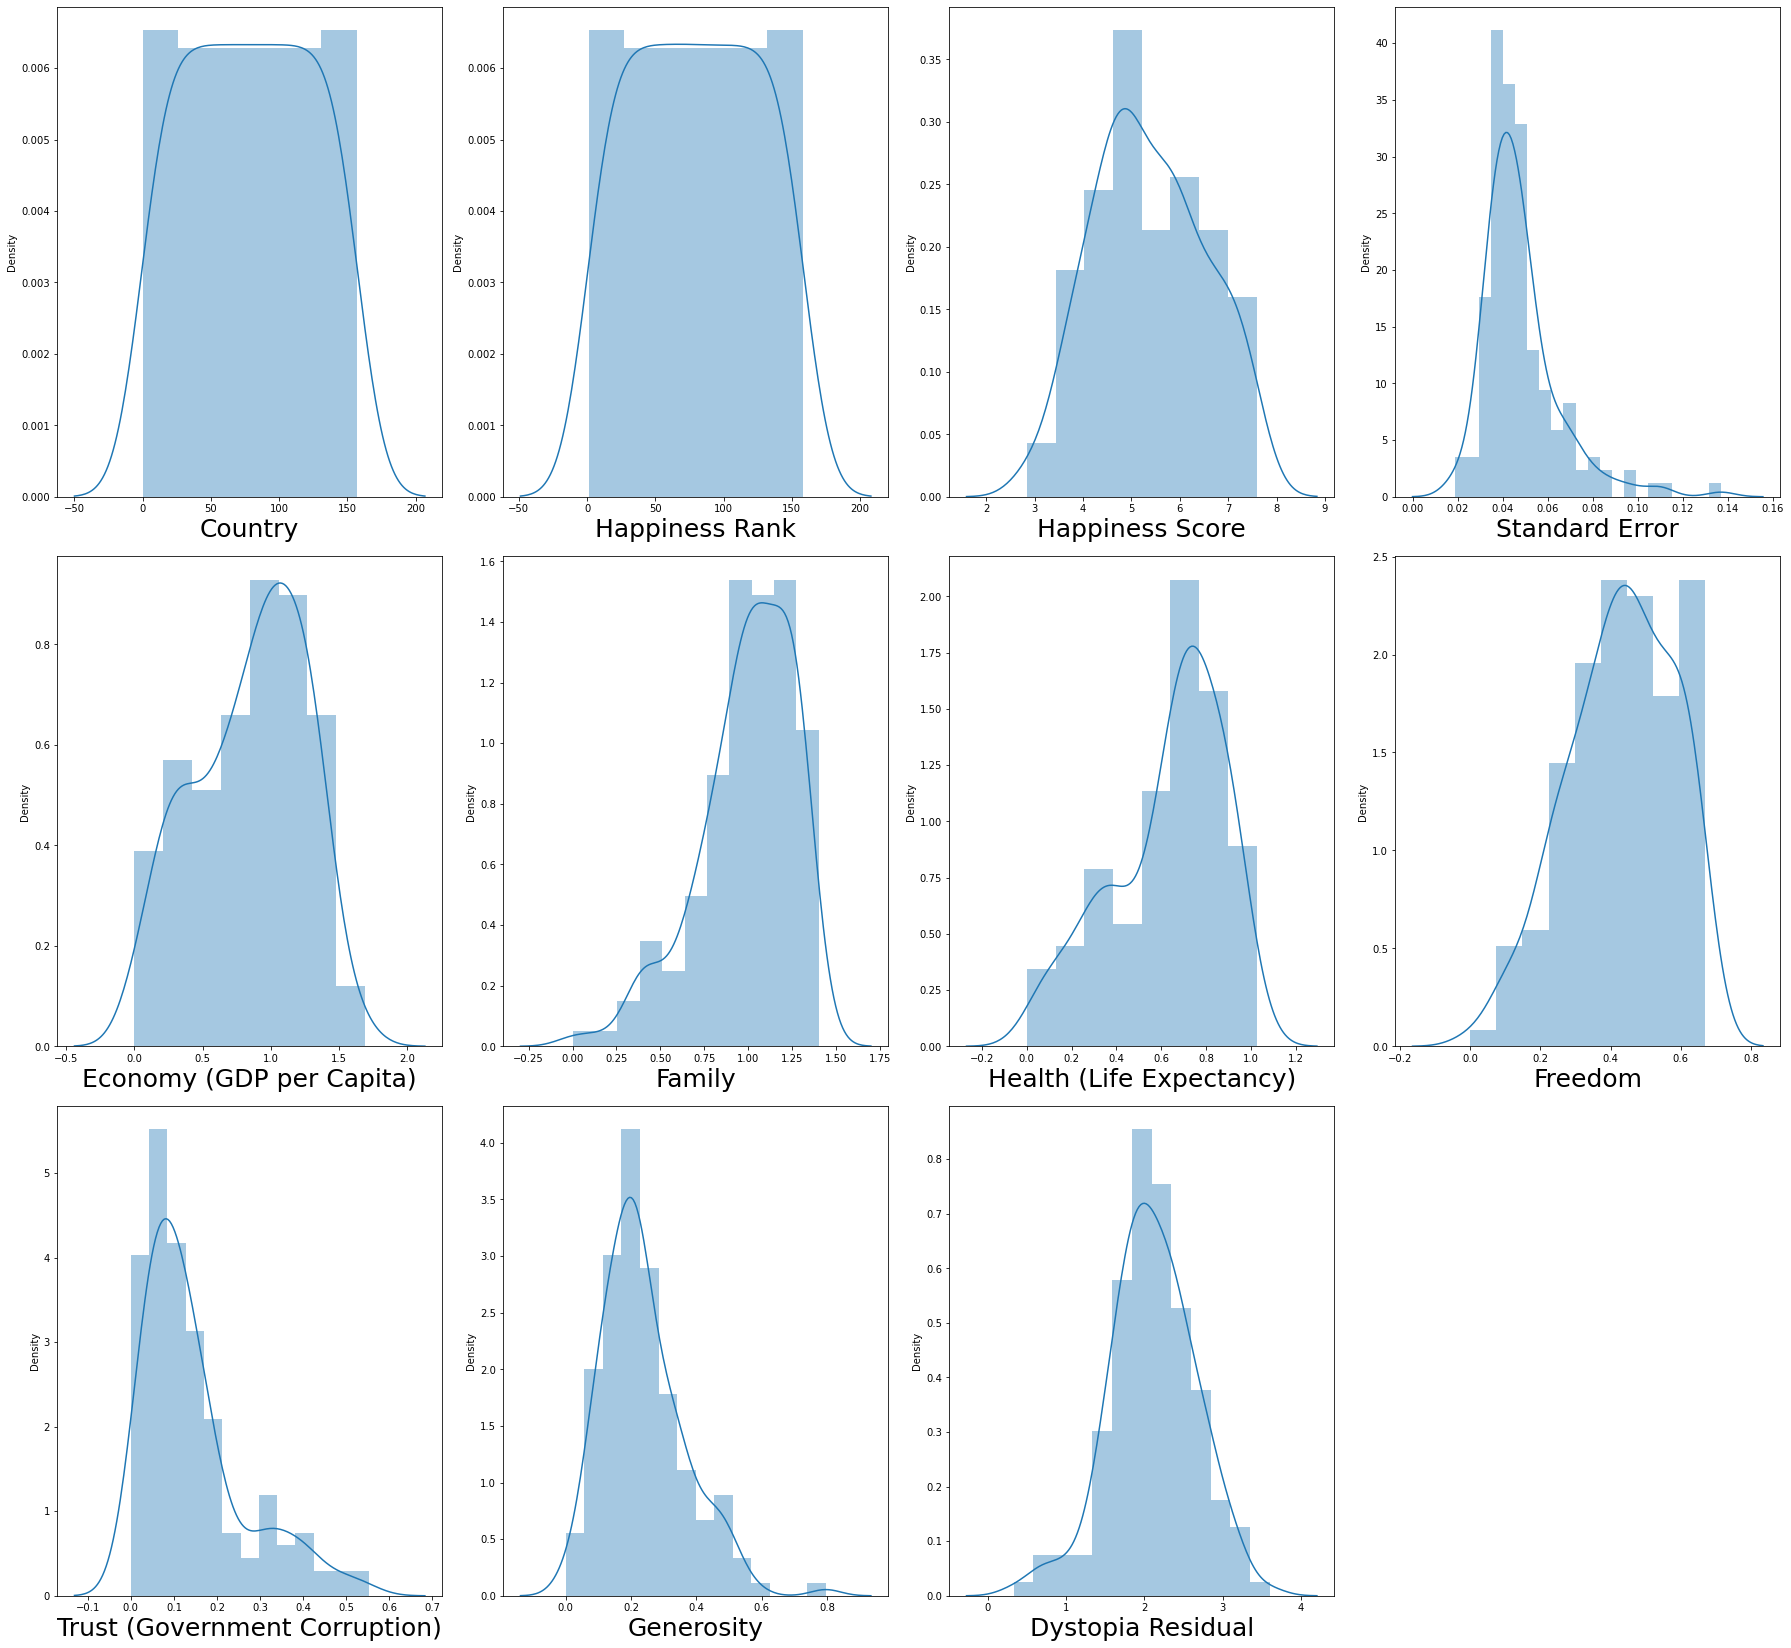

In [15]:
plt.figure(figsize=(25,30),facecolor='white')
plotnumber =1

for column in dataframe1:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(dataframe1[column])
        plt.xlabel(column,fontsize=25)
        
        plotnumber+=1
plt.tight_layout()        

In [16]:
x=dataframe1.drop(columns=['Happiness Score'])
y=dataframe1['Happiness Score']

In [17]:
dataframe1.skew()

Country                          0.000000
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [18]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [19]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

# Checking for Multicollinearity using Variance Inflation Factor (VIF)

In [20]:
x_scaled.shape

(158, 10)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

#checking vif values
vif

,vif,Features
0,1.081860,Country
1,73.517566,Happiness Rank
2,1.178494,Standard Error
3,12.945893,Economy (GDP per Capita)
4,5.544160,Family
5,8.064307,Health (Life Expectancy)
6,3.134117,Freedom
7,1.950045,Trust (Government Corruption)
8,1.899477,Generosity
9,17.479377,Dystopia Residual


In [22]:
x1=x.drop(columns=['Happiness Rank'])
scalar=StandardScaler()
x1_scaled=scalar.fit_transform(x1)


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x1_scaled,i) for i in range(x1_scaled.shape[1])]
vif["Features"] = x1.columns

#checking vif values
vif

,vif,Features
0,1.053259,Country
1,1.142038,Standard Error
2,4.121681,Economy (GDP per Capita)
3,2.003670,Family
4,3.336371,Health (Life Expectancy)
5,1.751455,Freedom
6,1.446436,Trust (Government Corruption)
7,1.297694,Generosity
8,1.057878,Dystopia Residual


In [24]:
x1_scaled

array([[ 1.23877001, -0.80592569,  1.36962124, ...,  2.30965159,
         0.47103971,  0.75825809],
       [-0.44946522,  0.05588945,  1.13522625, ..., -0.01647953,
         1.57585637,  1.09285682],
       [-0.90989302, -0.8544869 ,  1.19286069, ...,  2.8427738 ,
         0.8242928 ,  0.71233526],
       ...,
       [ 1.26069514,  0.13253425, -0.45524543, ...,  0.38141902,
         1.85689094, -3.20843049],
       [-1.26069514,  2.26396166, -2.06756644, ..., -0.35771452,
        -0.31694987, -0.48198451],
       [ 1.37032081,  1.13418227, -1.58633379, ..., -0.30180313,
        -0.5581534 , -0.96361241]])

In [25]:
# MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x1_scaled = scaler.fit_transform(x1)


In [26]:
## split data into train and test.Model will be built on trainning data and tested on test data.
from sklearn.model_selection import train_test_split
x1_train,x1_test,y_train,y_test=train_test_split(x1_scaled,y,test_size=0.25,random_state=21) #keep random state so that u keep it constant
y_train.head()

87     5.102
60     5.770
10     7.278
135    4.077
96     4.898
Name: Happiness Score, dtype: float64

In [27]:
reg=LinearRegression()
reg.fit(x1_train,y_train)

LinearRegression()

# the model was initiated and trained


In [28]:
#by using the R2 score method trying to find the score
reg.score(x1_train,y_train)

0.9999999440735141

In [29]:
reg.score(x1_test,y_test)

0.9999999369505782